In [1]:
# Essential - general
import numpy as np
import matplotlib.pyplot as plt

# Essential - astro
import astropy.units as u
import gala.integrate as gi
import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic

# Style
import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rcParams.update({'font.size': 25})

In [3]:
# import astropy.units as u
# import gala.integrate as gi
# import gala.dynamics as gd
# import gala.potential as gp
# from gala.units import galactic

In [4]:
# Setting the potential
pot = gp.MilkyWayPotential(units = galactic)

In [5]:
# Generating a mock distribution
rng = np.random.RandomState(313)

x_0 = -8.2
vy_0 = pot.circular_velocity([x_0,0,0]*u.kpc).to('km/s').value
N_particles = 1_000

pos = rng.normal(loc=[x_0,0,0], scale=0.1, size=(N_particles,3)).T * u.kpc
vel = rng.normal(loc=[0,*vy_0,0], scale=1, size=(N_particles,3)).T * u.km/u.s


w0 = gd.PhaseSpacePosition(pos=pos, vel=vel)

In [6]:
# Integrating the distribution for 100 Myr
H = gp.Hamiltonian(pot)
orbit = H.integrate_orbit(w0, t1 = 0, t2=100*u.Myr, n_steps=5,
                            Integrator=gi.DOPRI853Integrator)

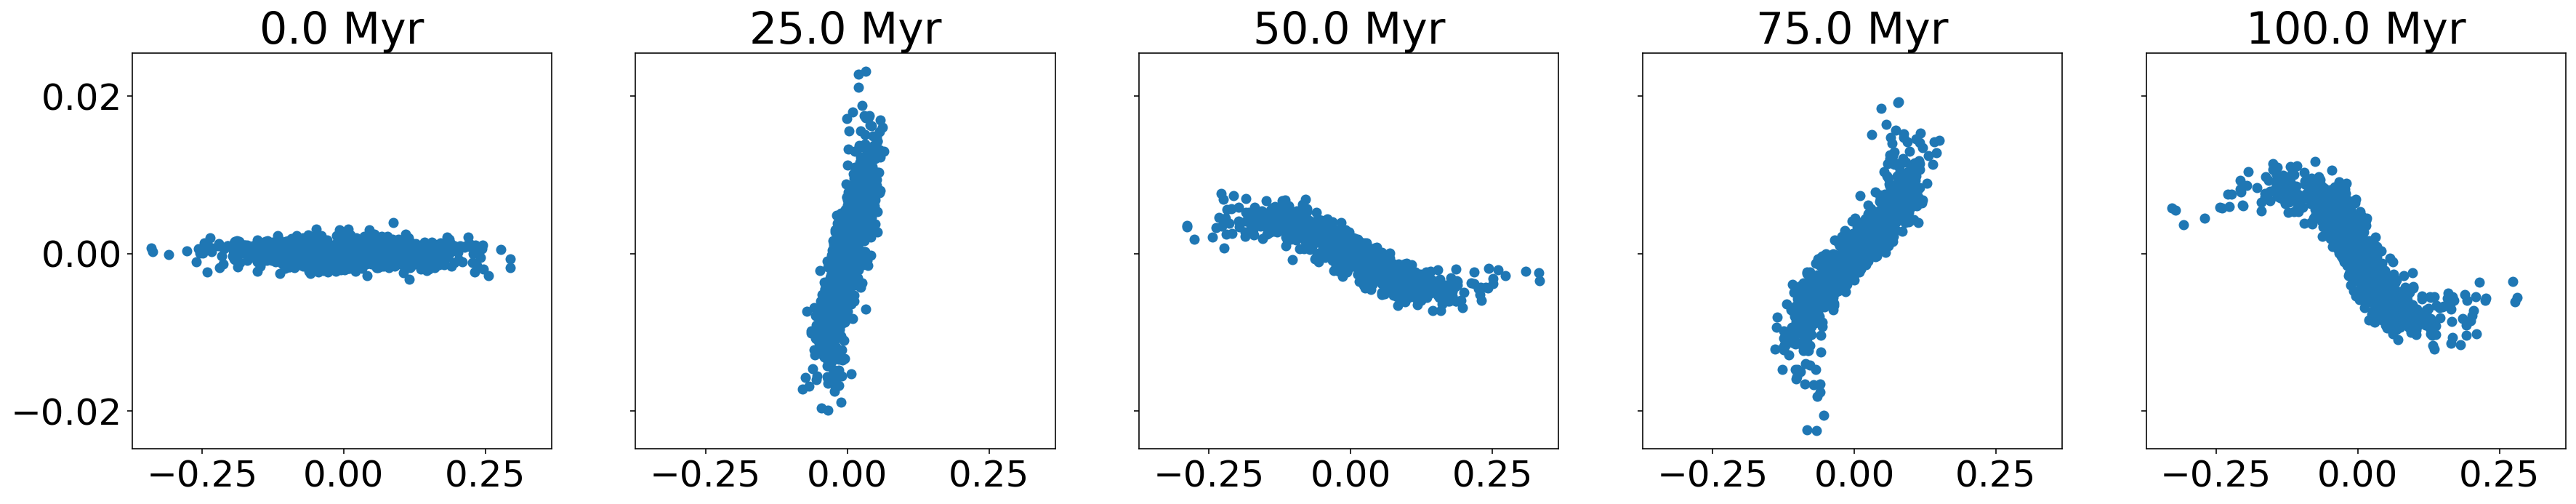

In [7]:
# Inspecting the distribution
fig, axes = plt.subplots(ncols=5, figsize=(30,5), sharex=True, sharey=True)


for o, time, ax in zip(orbit, orbit.t, axes):
    ax.scatter(o.z, o.v_z)
    ax.set_title(time)

In [8]:
# Repeating for a larger distribution and longer time

rng = np.random.RandomState(313)

pos = rng.normal(loc=[x_0,0,0.1], scale=0.04, size=(10000,3)).T * u.kpc
vel = rng.normal(loc=[0,*vy_0,2], scale=1, size=(10000,3)).T * u.km/u.s

# Values based on Antoja et al. 2018
# https://arxiv.org/pdf/1804.10196.pdf

w0 = gd.PhaseSpacePosition(pos=pos,vel=vel)

In [9]:
pot = gp.MilkyWayPotential(units = galactic)

H = gp.Hamiltonian(pot)
orbit = H.integrate_orbit(w0, t1 = 0, t2=2*u.Gyr, n_steps=5,
                            Integrator=gi.DOPRI853Integrator)

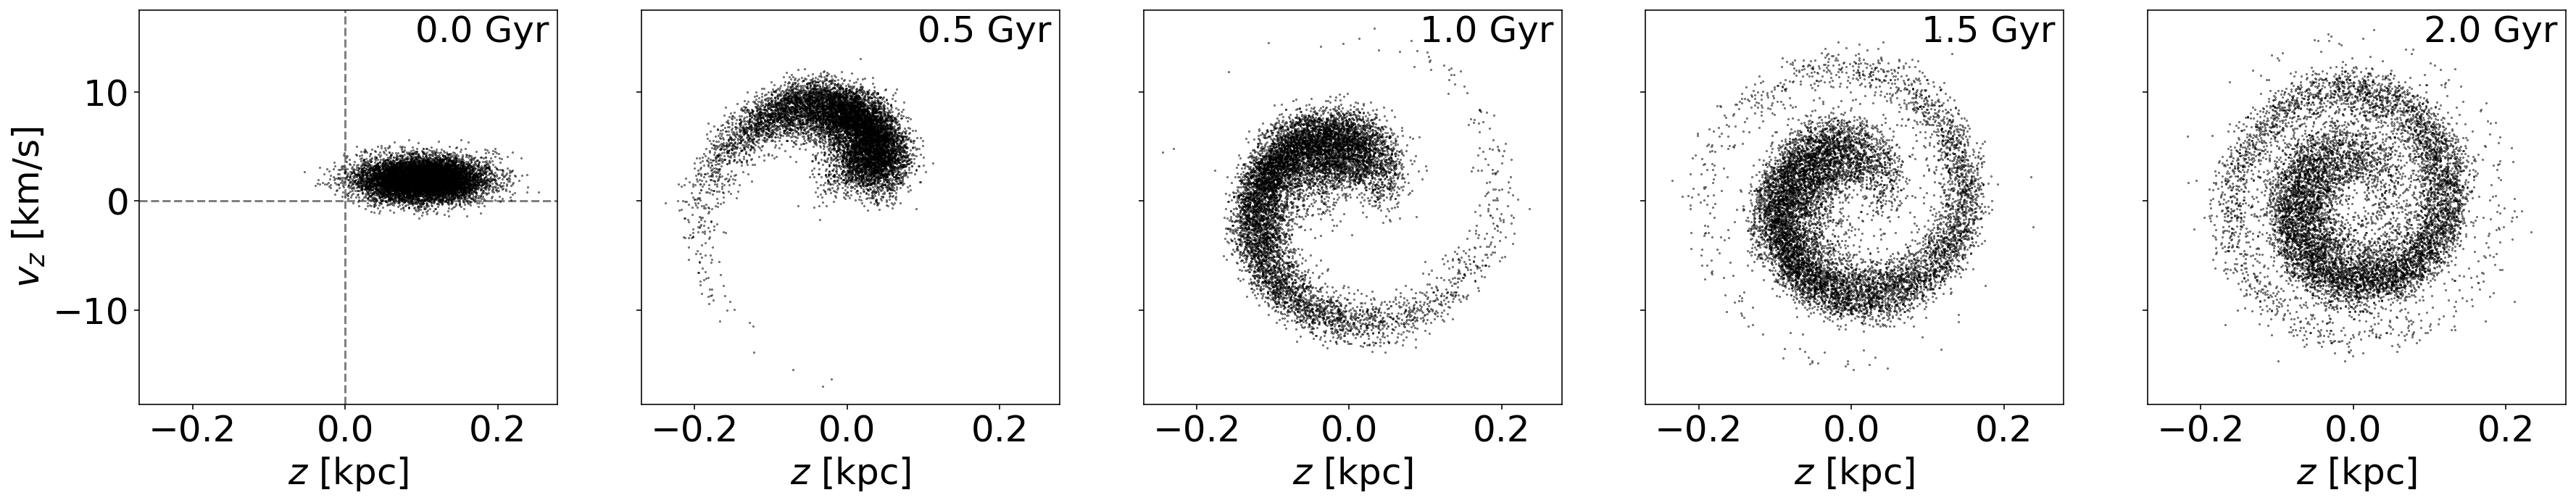

In [10]:
fig, axes = plt.subplots(ncols=5, figsize=(30,5), sharex=True, sharey=True)

text_args = dict(x = 0.98, y = 0.99,
                 va='top', ha='right', 
                 fontsize=25)

for (o, time, ax) in zip(orbit, orbit.t, axes):
    plt.text(s = time.to('Gyr'), transform=ax.transAxes, **text_args)
    ax.scatter(o.z.to('kpc'), o.v_z.to('km/s'), s=0.1, c='k')

    
    if time.value == 0:
        ax.axvline(0, c='gray', zorder=0, ls='--')
        ax.axhline(0, c='gray', zorder=0, ls='--')

    ax.set_xlabel('$z$ [kpc]')
axes[0].set_ylabel('$v_z$ [km/s]')

plt.show()
# plt.savefig('./imgs/phase-space-spiral.png', dpi=150, pad_inches=0.02, bbox_inches='tight', transparent=True)